# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\canas\MSDS600\data\msds600\churn_data.csv', index_col='customerID')
# df.drop('Diabetes_bool', axis=1, inplace=True)
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [2]:
df_new_churn_data = pd.read_csv(r'C:\Users\canas\MSDS600\data\msds600\new_churn_data.csv', index_col='customerID')
# df.drop('Diabetes_bool', axis=1, inplace=True)
df_new_churn_data

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
customerID,,,,,,,
9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


In [3]:
df_new_churn_data_un = pd.read_csv(r'C:\Users\canas\MSDS600\data\msds600\new_churn_data_unmodified.csv', index_col='customerID')
# df.drop('Diabetes_bool', axis=1, inplace=True)
df_new_churn_data_un

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,
9305-CKSKC,22,Yes,Month-to-month,Electronic check,97.40,811.70
1452-KNGVK,8,No,One year,Mailed check,77.30,1701.95
6723-OKKJM,28,Yes,Month-to-month,Credit card (automatic),28.25,250.90
7832-POPKP,62,Yes,Month-to-month,Electronic check,101.70,3106.56
6348-TACGU,10,No,Two year,Credit card (automatic),51.15,3440.97


In [4]:
from pycaret.classification import ClassificationExperiment 

In [5]:
automl = ClassificationExperiment() #setup(df, target='Diabetes')

In [6]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,6542
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Ordinal features,1
9,Numeric features,3


In [7]:
automl

In [8]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7935,0.8347,0.7935,0.7824,0.7833,0.4251,0.4333,0.4490
lr,Logistic Regression,0.7923,0.8307,0.7923,0.7832,0.7850,0.4339,0.4388,2.2230
ada,Ada Boost Classifier,0.7895,0.8318,0.7895,0.7791,0.7804,0.4197,0.4265,0.2380
lda,Linear Discriminant Analysis,0.7882,0.8209,0.7882,0.7784,0.7809,0.4233,0.4274,0.0870
ridge,Ridge Classifier,0.7874,0.0000,0.7874,0.7736,0.7732,0.3937,0.4063,0.0810
lightgbm,Light Gradient Boosting Machine,0.7811,0.8176,0.7811,0.7697,0.7722,0.3984,0.4038,16.4370
svm,SVM - Linear Kernel,0.7730,0.0000,0.7730,0.7568,0.7516,0.3336,0.3534,0.1000
rf,Random Forest Classifier,0.7653,0.7887,0.7653,0.7545,0.7580,0.3643,0.3673,0.2970
knn,K Neighbors Classifier,0.7633,0.7395,0.7633,0.7485,0.7525,0.3444,0.3497,0.1090
et,Extra Trees Classifier,0.7521,0.7652,0.7521,0.7445,0.7472,0.3412,0.3428,0.2530


In [9]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6542, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

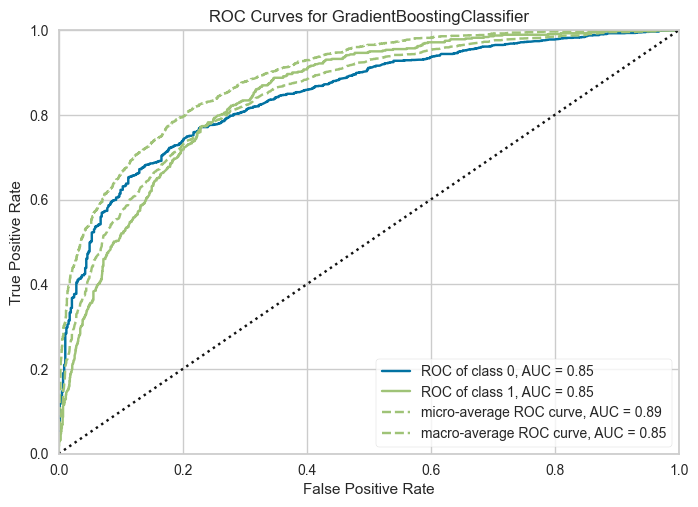

In [11]:
automl.plot_model(best_model)

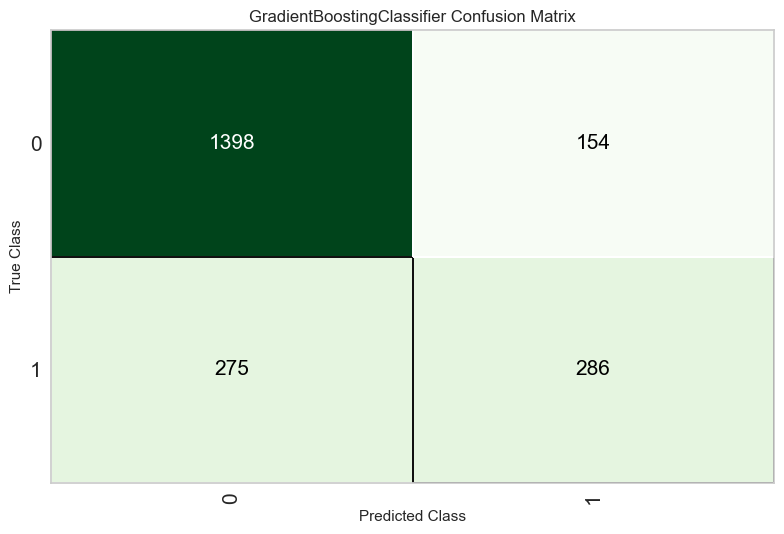

In [12]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [13]:
df.iloc[-2:-1].shape

(1, 7)

In [14]:
df.iloc[-2].shape

(7,)

In [15]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5215


In [16]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8134,0.8648,0.8134,0.8043,0.8053,0.4847,0.4913


In [17]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,No,Yes,0.5855
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,No,No,0.9210
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,Yes,No,0.5326
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,No,No,0.9355
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,Yes,Yes,0.6226


In [18]:
automl.save_model(best_model, 'my_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_

In [19]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('my_model')

Transformation Pipeline and Model Successfully Loaded


In [20]:
new_data = df.iloc[-2:-1]

In [21]:
#new_pycaret.predict_model(loaded_model, new_data)
new_pycaret.predict_model(loaded_model, df_new_churn_data)


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,prediction_label,prediction_score
customerID,,,,,,,,,
9305-CKSKC,22,1,0,2,97.400002,811.700012,36.895454,No,0.6879
1452-KNGVK,8,0,1,1,77.300003,1701.949951,212.743744,No,0.8769
6723-OKKJM,28,1,0,0,28.250000,250.899994,8.960714,No,0.8820
7832-POPKP,62,1,0,2,101.699997,3106.560059,50.105808,No,0.7867
6348-TACGU,10,0,0,1,51.150002,3440.969971,344.096985,No,0.9189


In [28]:
from IPython.display import Code

Code('predict_mycode.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(filepath):
    """
    Loads diabetes data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    model = load_model('my_model')
    predictions = predict_model(model, data=df)
    #predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    #predictions['Churn_prediction'].replace({1: 'Churn', 0: 'No Churn'},
    #                                        inplace=True)
    return predictions['Churn_prediction']


if __name__ == "__main__":
    df = load_data('new_churn_data_unmodified.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [30]:
%run predict_mycode.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure PhoneService        Contract            PaymentMethod  \
customerID                                                                 
9305-CKSKC      22          Yes  Month-to-month         Electronic check   
1452-KNGVK       8           No        One year             Mailed check   
6723-OKKJM      28          Yes  Month-to-month  Credit card (automatic)   
7832-POPKP      62          Yes  Month-to-month         Electronic check   
6348-TACGU      10           No        Two year  Credit card (automatic)   

            MonthlyCharges  TotalCharges prediction_label  prediction_score  
customerID                                                                   
9305-CKSKC       97.400002    811.700012              Yes            0.7234  
1452-KNGVK       77.300003   1701.949951               No            0.8746  
6723-OKKJM       28.250000    250.899994               No            0.8084  
7832-POPKP

# Summary